In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

import seaborn as sns
import matplotlib.pyplot as plt

# Plan

What
- create model to identify wether mushroom is poisonous or not

# Acquire

### this dataset is from kaggle 
- (https://www.kaggle.com/datasets/prishasawhney/mushroom-dataset/data)

In [3]:
df = pd.read_csv('mushroom_cleaned.csv')

target variable is 'class' collum
- 1 = poisonous 
- 0 = edible

# Prepare 

In [4]:
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [6]:
df.shape

(54035, 9)

# data was fine the way it was 

# Explore

In [7]:
df.describe()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


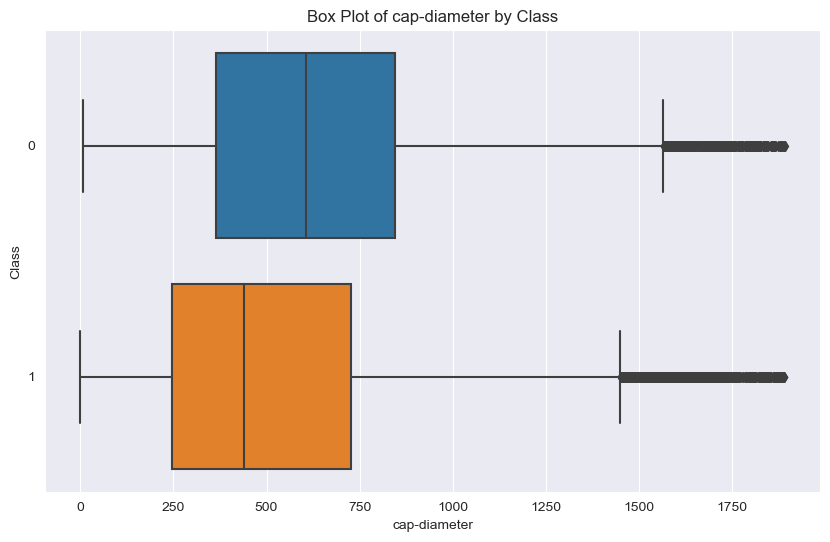

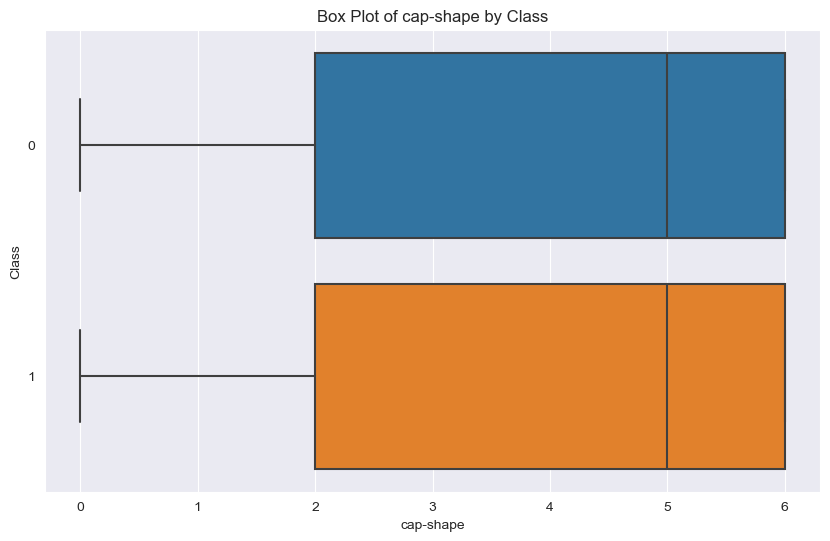

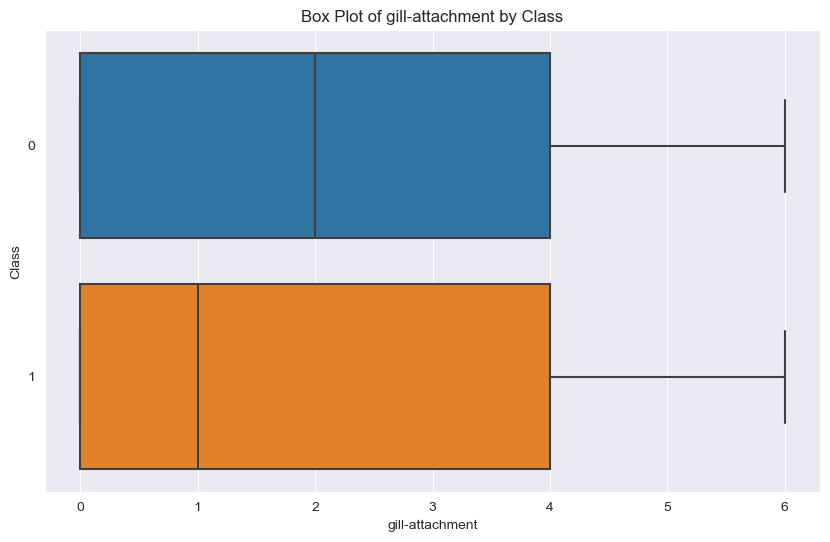

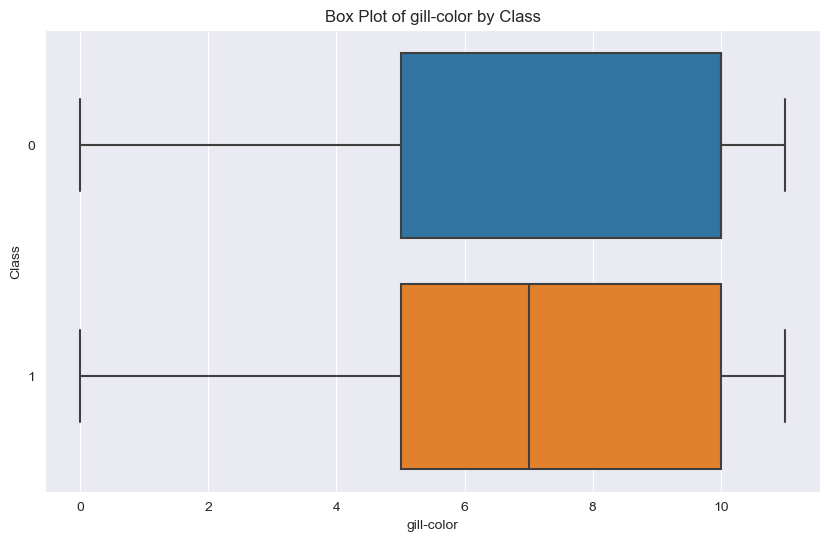

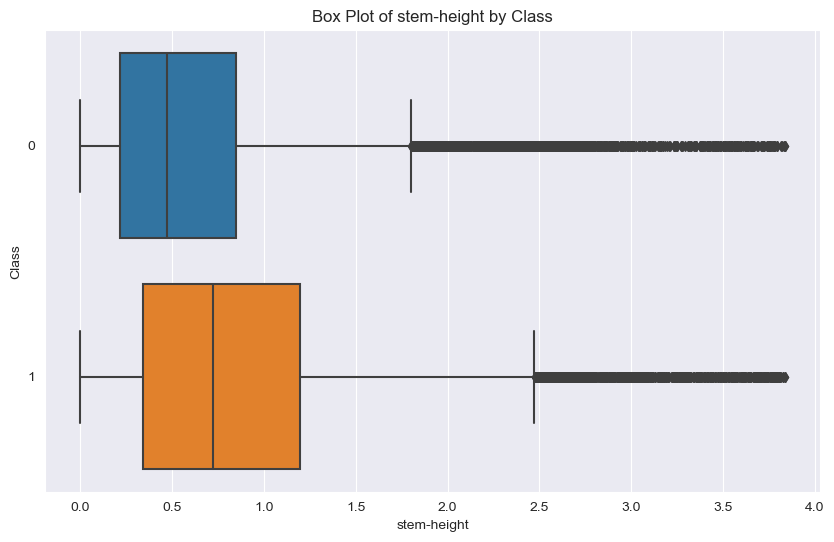

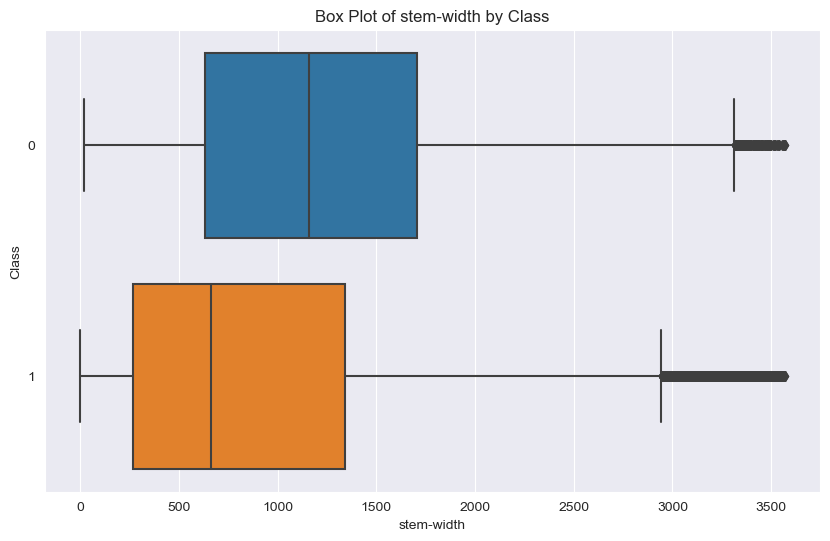

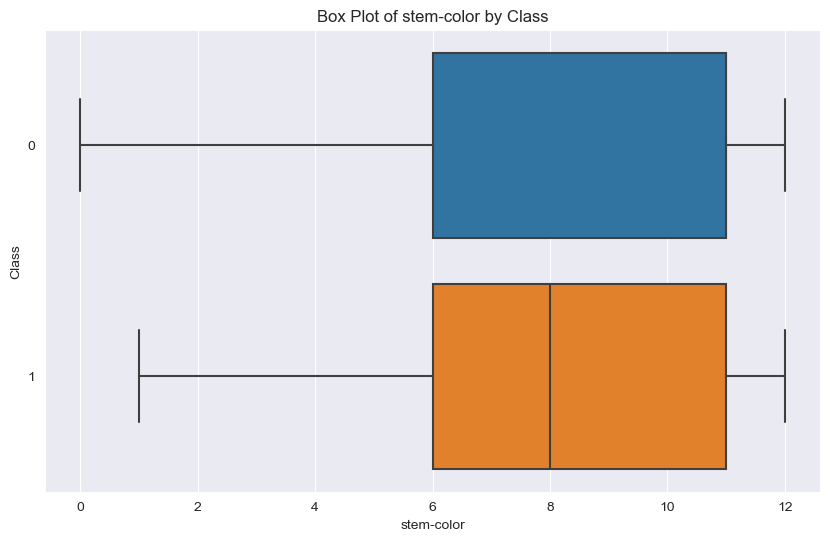

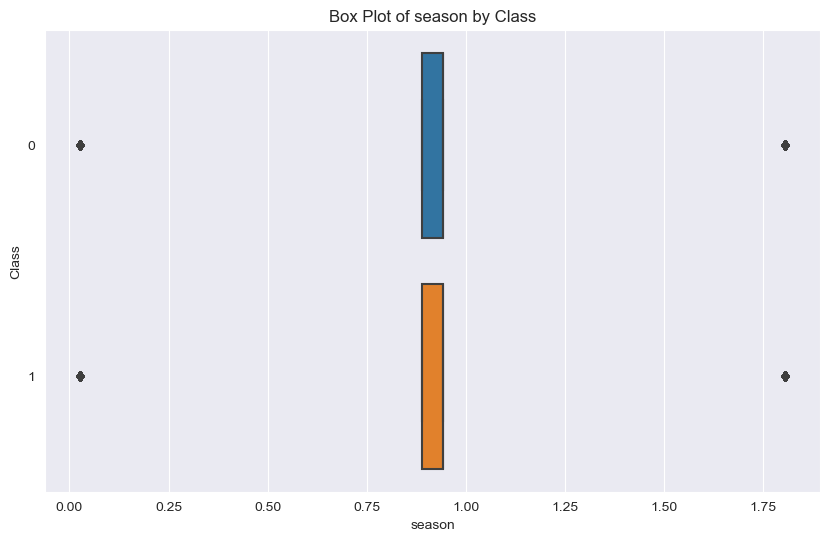

In [11]:
for col in df.columns:
    if col != 'class':  # Skip the 'class' column
        plt.figure(figsize=(10, 6))  # Set the figure size for better visibility
        sns.boxplot(data=df, x=col, y='class', orient='h')  # Create a horizontal box plot with hue based on 'class'
        plt.title(f'Box Plot of {col} by Class')  # Title for each box plot
        plt.xlabel(col)  # Label for x-axis
        plt.ylabel('Class')  # Label for y-axis (class)
        plt.show()  # Display the plot

# findings in boxplots
cols with possible correlations
- stem-width
- gill-attachment
- cap diameter

/opt/homebrew/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


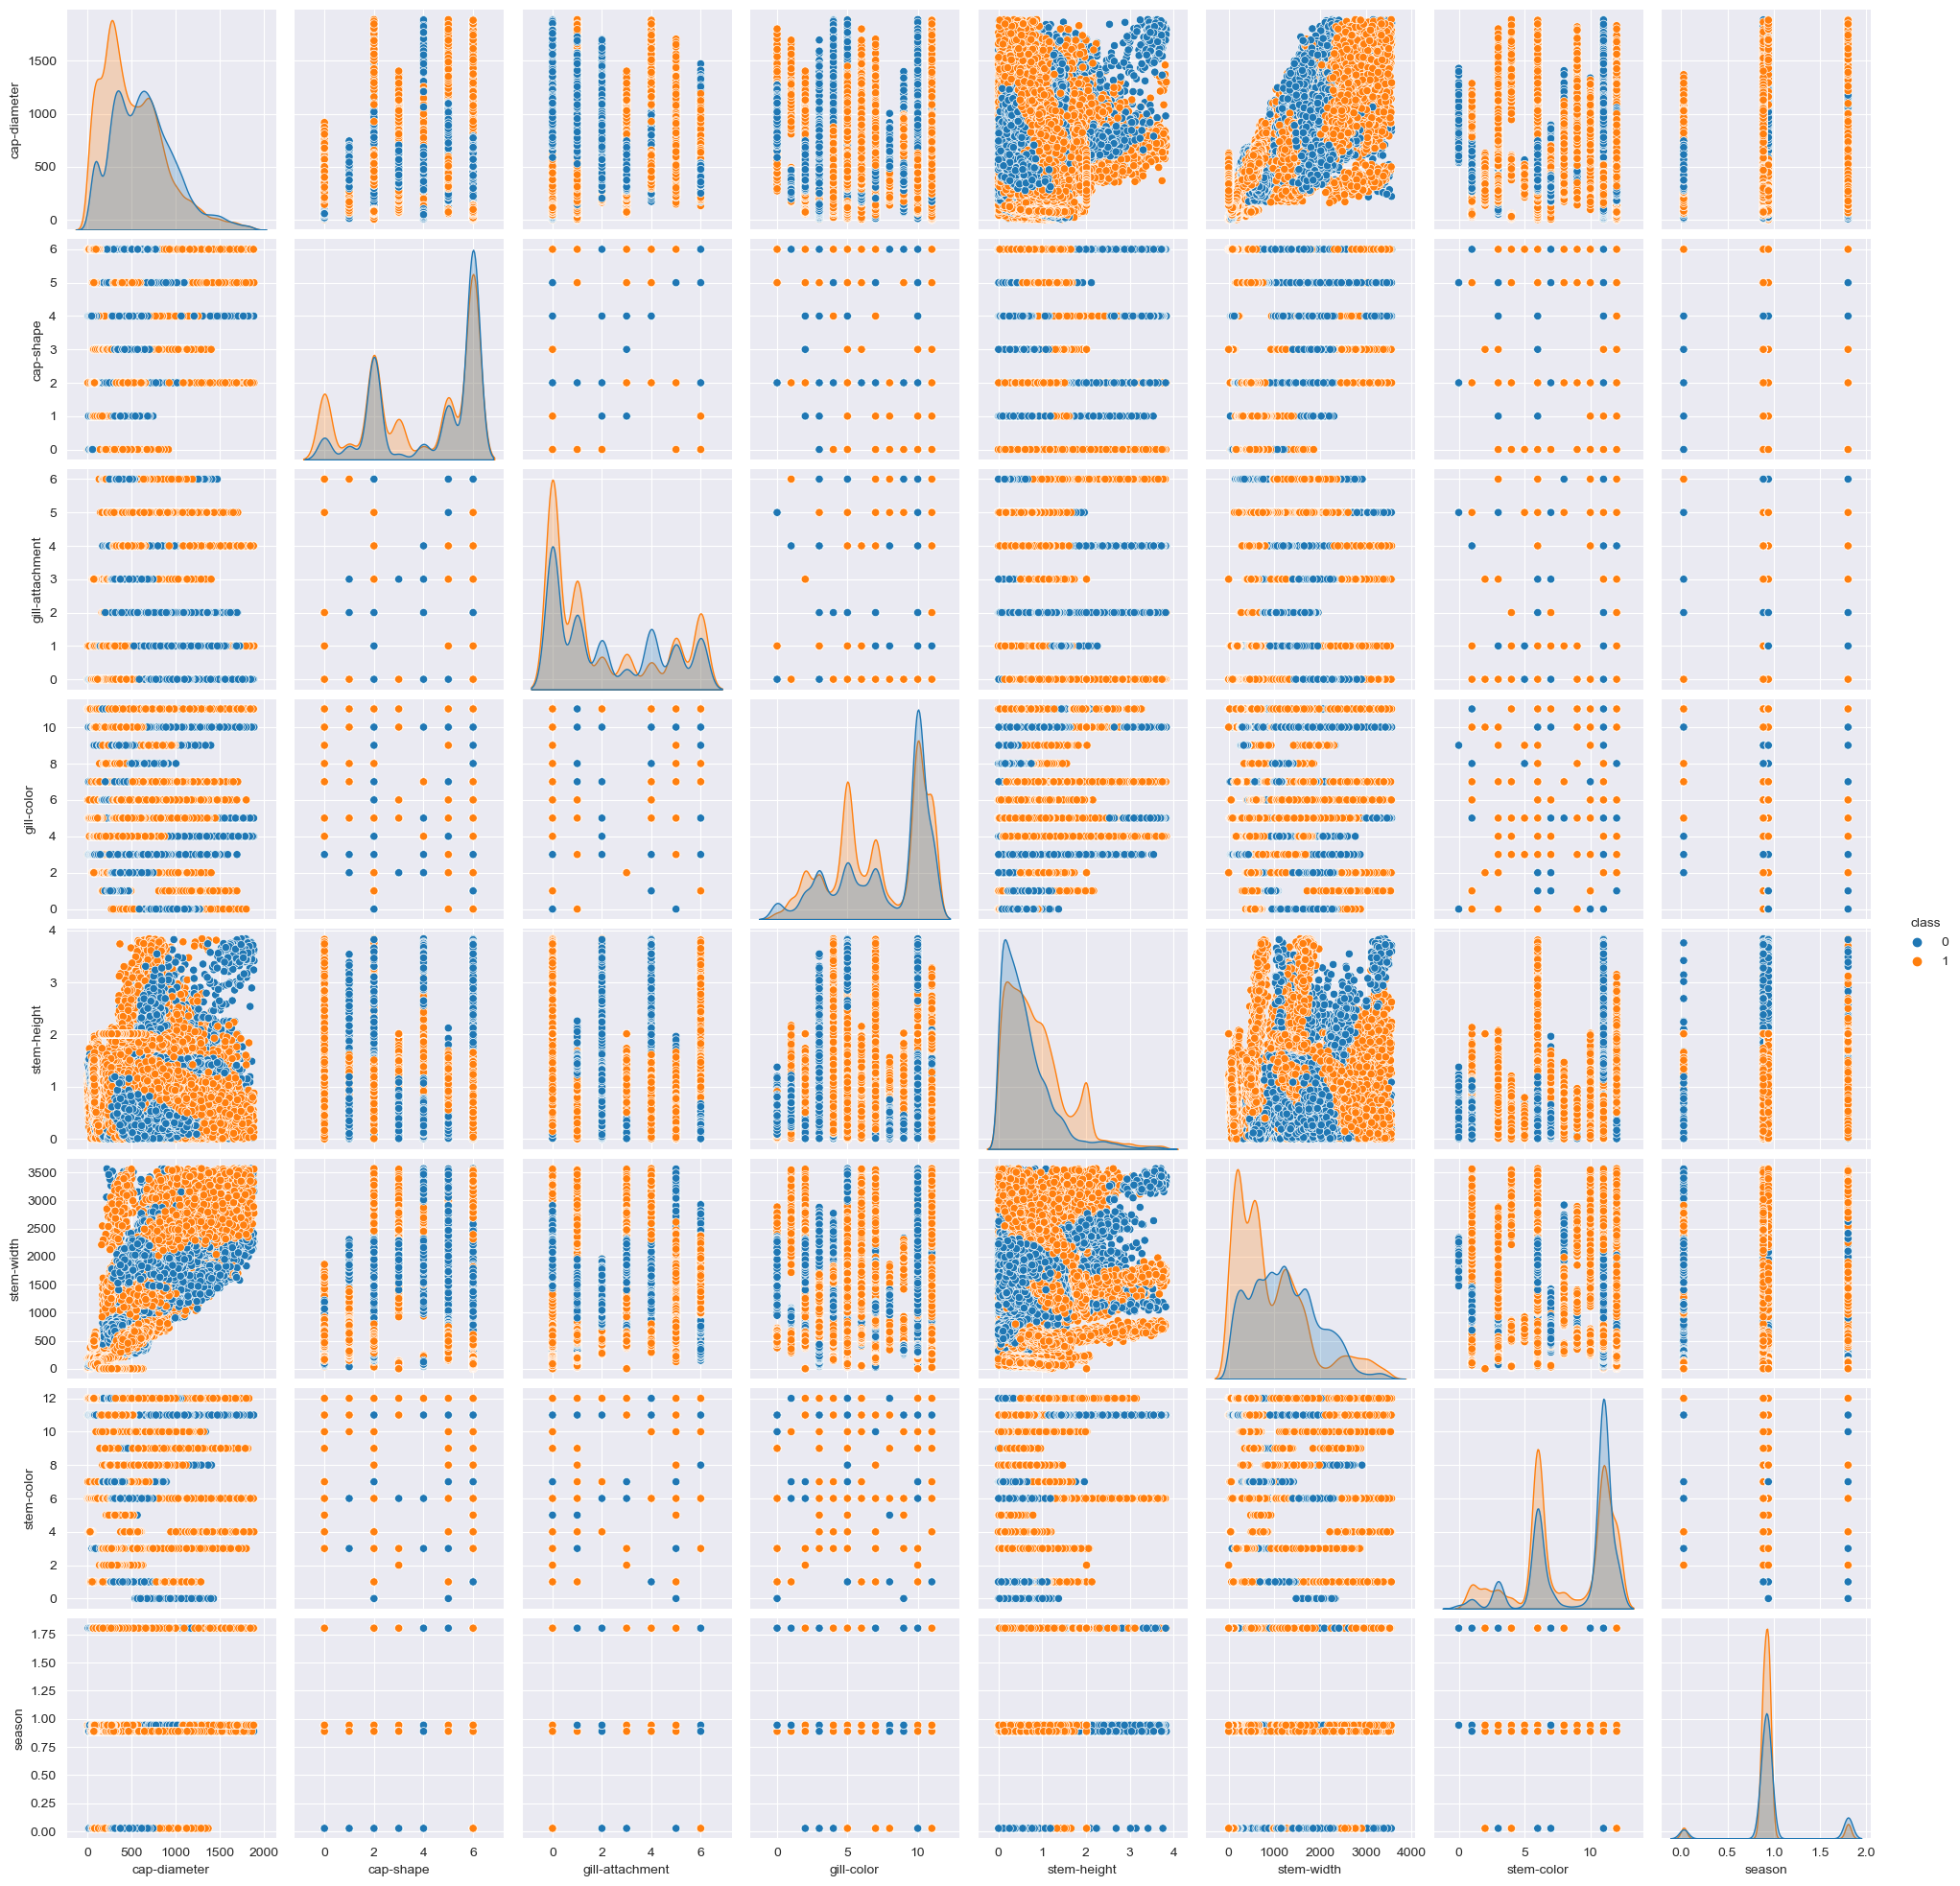

In [16]:
sns.pairplot(df, hue='class')
plt.show()

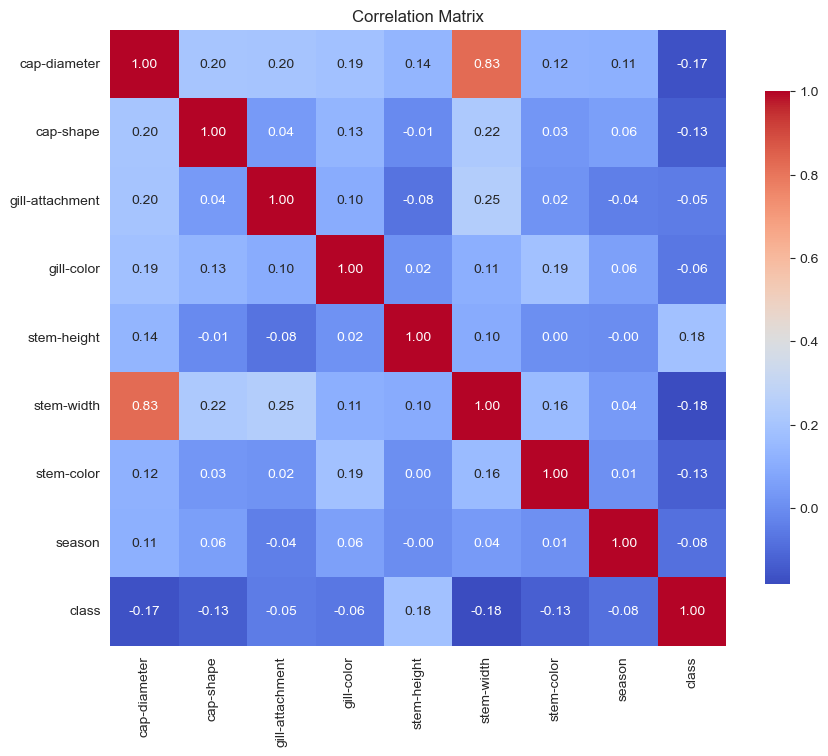

In [17]:
corr = df.corr()

# Generate a heatmaps
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={'shrink': .8})
plt.title('Correlation Matrix')
plt.show()